# Instituto Tecnologico de Costa Rica
# Ingenieria en Computacion
# Inteligencia artificial
---
## Tarea Programada 3
## Profesora : Maria Auxialiadora Mora
---
## Estudiantes: 
## Kenneth Corrales Lizano 2017151342
## Fabian Vives Castro 2018319257
---

#Pregunta 1

In [1]:
# Bibliotecas
   
import numpy as np # vectores, matrices grandes y multidimensionales, y funciones para estas

# Para graficar
%matplotlib inline
import matplotlib.pyplot as plt

#Bibliotecas generales
import torch
import torchvision
import torchvision.transforms as transforms # transformaciones generales


# Redes neuronales
import torch.nn as nn
import torch.nn.functional as F


# Pérdida y optimización
import torch.optim as optim

import os
import random

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Cargar y normalizar los datos

In [2]:
# Dirección de los directorios con las imagenes a usar para etrenar y testear
train_dir = '../Proyecto3/Dataset/train' # entreno
test_dir = '../Proyecto3/Dataset/test' # testeo
classes = os.listdir(train_dir) # Preparamos una lista con todas las clases de aves
print(len(classes))
print(classes)

400
['WILD TURKEY', 'CAPE LONGCLAW', 'CASSOWARY', 'CRESTED SHRIKETIT', 'BARROWS GOLDENEYE', 'GUINEAFOWL', 'EASTERN GOLDEN WEAVER', 'PURPLE GALLINULE', 'CUBAN TROGON', 'SNOWY EGRET', 'HOATZIN', 'AFRICAN FIREFINCH', 'BLACK FRANCOLIN', 'INDIGO BUNTING', 'ROBIN', 'BELTED KINGFISHER', 'MALAGASY WHITE EYE', 'COCKATOO', 'GRAY CATBIRD', 'NORTHERN GANNET', 'CHESTNET BELLIED EUPHONIA', 'INDIAN ROLLER', 'RED TAILED THRUSH', 'BULWERS PHEASANT', 'INCA TERN', 'SCARLET MACAW', 'MOURNING DOVE', 'LESSER ADJUTANT', 'STRIPPED MANAKIN', 'CARMINE BEE-EATER', 'AMETHYST WOODSTAR', 'CEDAR WAXWING', 'RUBY THROATED HUMMINGBIRD', 'BORNEAN LEAFBIRD', 'HOUSE FINCH', 'CRESTED COUA', 'PURPLE SWAMPHEN', 'PEACOCK', 'MANDRIN DUCK', 'RED WINGED BLACKBIRD', 'FLAME TANAGER', 'UMBRELLA BIRD', 'GREEN BROADBILL', 'OKINAWA RAIL', 'PINK ROBIN', 'COMMON FIRECREST', 'REGENT BOWERBIRD', 'ROCK DOVE', 'CRIMSON CHAT', 'EASTERN BLUEBIRD', 'GOLD WING WARBLER', 'BLACK-THROATED SPARROW', 'EMU', 'CROWNED PIGEON', 'MANGROVE CUCKOO', 'EURO

In [3]:
from torchvision.datasets import ImageFolder

# Normalización: multiple images are put into a common statistical distribution in terms of size and pixel values
# Data normalization is an important step which ensures that each input parameter (pixel, in this case)
# has a similar data distribution. This makes convergence faster while training the network. ...
# The distribution of such data would resemble a Gaussian curve centered at zero

# To normalize
transform = transforms.Compose( # Transforms are common image transformations. 
    [transforms.Resize(112), # cambiamos tamaño a 112x112
        transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = ImageFolder(train_dir, transform=transform) # Image folder ocupa que las imagenes esten separadas en folderse
                                                    # cada folder siento la etiqueta(label) de cada imagen
testset = ImageFolder(test_dir, transform=transform)

In [4]:
print(trainset)

Dataset ImageFolder
    Number of datapoints: 58388
    Root location: ../Proyecto3/Dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=112, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [5]:
# view one image shape of the dataset.
img, label = trainset[random.randrange(0, 45278)]
print(img.shape)

torch.Size([3, 112, 112])


In [6]:
train_size = len(trainset)
test_size = len(testset)
print(train_size, test_size)

58388 2000


In [7]:
train_ds = trainset
test_ds = testset

len(train_ds),len(test_ds)   

(58388, 2000)

In [8]:
from torch.utils.data.dataloader import DataLoader

batch_size = 32
train_loader = DataLoader(trainset, batch_size, shuffle=True, num_workers=2, pin_memory=True) 
test_loader = DataLoader(testset, batch_size, num_workers=2, pin_memory=True)

## Explorar los datos

In [9]:
# Mostar la imagen
def imshow(img):
    img = img / 2 + 0.5     # Desnormalizar
    npimg = img.numpy()
    print('Label: ', trainset.classes[label], "("+str(label)+")")
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Label:  APAPANE (28)


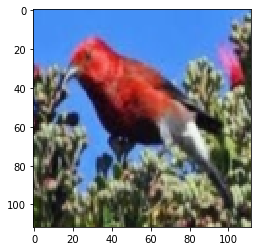

In [10]:
imshow(img)

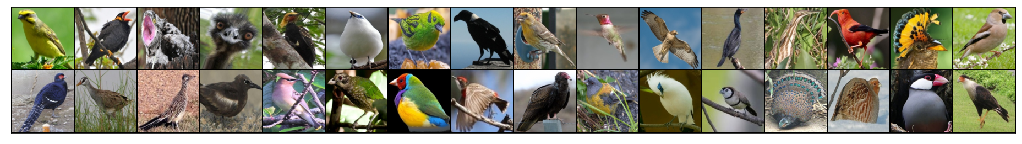

In [11]:
import matplotlib.pyplot as plt

for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(torchvision.utils.make_grid(images/ 2 + 0.5 , nrow=16).permute(1,2,0))
    break

## Definir la red convolucional

In [12]:
# Crear el modelo de aprendizaje profundo, se crea una clase 
# que envuelve la clase nn.Module 

class CNNet(nn.Module):
    # Modelo de red convolucional.
    # :params
    #    torch.nn.Module clase que implenta la funionalidad de
    #    redes neuronales de Pytorch 

    def __init__(self): 
        # Función para definir e inicializar la red.
        super(CNNet, self).__init__()

        #capa convolucional
        #torch.nn.Conv2d(in_channels, out_channels, kernel_size...
        self.conv1 = nn.Conv2d(3, 6, 5)

        #torch.nn.MaxPool2d(kernel_size, stride,...        
        self.pool = nn.MaxPool2d(2, 2)  

        #torch.nn.Conv2d(in_channels, out_channels, kernel_size...
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        #Capas perceptrón del modelo
        self.fc1 = nn.Linear(16 * 25 * 25, 5000)
        
        self.fc2 = nn.Linear(5000, 1000)
        
        #Salida a 10 clases 
        self.fc3 = nn.Linear(1000, 310)

    def forward(self, x):
        # Aplica el modelo a los datos de entrada.
        # :param
        #   x : datos de la imagen a procesar.
        
        #Pase de la entrada por todas las capas de la red.
        #print("Tamaño del x de entrada al entrenamiento:" , x.shape)

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #cont = 1;
        #if(cont == 1):
            #print(x.size(0)) # torch.Size([64, 128, 10, 10])
            #print(x.shape)
            # print(x)
            #cont +=1
        #print("Tamaño de x luego de la convolución y pool:", x.shape)
        x = x.view(-1, 16 * 25 * 25)
        #x = torch.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = CNNet()

## Definir los hiperparametros, por ejemplo, funcion de perdida, el optimizador, entre otros.

Se utiliza la función de pérdida de entropía cruzada y optimización por descenso de gradiente estocástico (Stochastic Gradient Descent - SGD).

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

## Entrenar la red

In [16]:
# cantidad de ciclos de entrenamiento o épocas
numEpoch = 3

for epoch in range(numEpoch):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        #print("i: ",i)
        # obtener los datos de entrada; 
        # data es una lista de la forma [inputs, labels]
        inputs, labels = data
        #               print("inputs, label")
        #print(inputs, labels)
        # inicializar los parámetros del gradiente.
        optimizer.zero_grad()
        #              print("optimizer")
        # Se realizan las predicciones con el modelo. 
        # Este código ejecuta el forward de las entradas.
        outputs = net(inputs)
        #        print("outputs")
        # Se calcula la pérdida utilizando Cross Entropy Loss
        loss = criterion(outputs, labels)       
        loss.backward()
        
        #El optimizador realiza las actualizaciones a través del método step().
        optimizer.step()

        # imprimir estadisticas
        #           print("antes del if i")
        running_loss += loss.item()
        if i % 100 == 99:    # imprimir mensaje cada 2000 mini-batches
            print('[%d, %5d] pérdida: %.3f' %
                (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Fin del entrenamiento')

IndexError: Target 378 is out of bounds.

## Evaluar el modelo resultante Accuracy, Precision, Recall y F1 (investigue como se utilizan estas medidas en clasificación)

Para verrificar si el resultado del entrenamiento es el esperado se debe evaluar el modelo con los datos de prueba.

Inicialmente se puede comprobar cómo se comporta el modelo con algunos de los datos de prueba.

tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4,
        4, 5, 5, 5, 5, 5, 6, 6])
Label:  APAPANE (28)


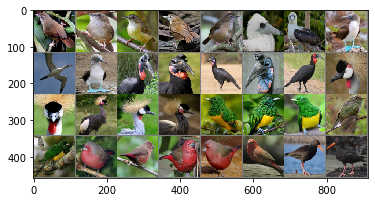

Etiqueta verdadera:  WILD TURKEY - WILD TURKEY - WILD TURKEY - WILD TURKEY - WILD TURKEY - CAPE LONGCLAW - CAPE LONGCLAW - CAPE LONGCLAW - CAPE LONGCLAW - CAPE LONGCLAW - CASSOWARY - CASSOWARY - CASSOWARY - CASSOWARY - CASSOWARY - CRESTED SHRIKETIT - CRESTED SHRIKETIT - CRESTED SHRIKETIT - CRESTED SHRIKETIT - CRESTED SHRIKETIT - BARROWS GOLDENEYE - BARROWS GOLDENEYE - BARROWS GOLDENEYE - BARROWS GOLDENEYE - BARROWS GOLDENEYE - GUINEAFOWL - GUINEAFOWL - GUINEAFOWL - GUINEAFOWL - GUINEAFOWL - EASTERN GOLDEN WEAVER - EASTERN GOLDEN WEAVER -


In [17]:
dataiter = iter(test_loader)
images, labels = dataiter.next() # batchsizze
print(labels)
# imprimir algunos ejemplos y la etiqueta original (la verdad)
imshow(torchvision.utils.make_grid(images))
print('Etiqueta verdadera: ', ' '.join('%5s -' % classes[labels[j]] for j in range(batch_size)))

In [18]:
outputs = net(images)

In [19]:
_, predicted = torch.max(outputs, 1)

print('Predicción: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(batch_size)))

Predicción:  ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD SPLENDID WREN ASHY THRUSHBIRD ASHY THRUSHBIRD SPLENDID WREN PURPLE GALLINULE PURPLE GALLINULE ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD SPLENDID WREN ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD ASHY THRUSHBIRD SPLENDID WREN SPLENDID WREN


In [20]:
# Se toma todos los datos de prueba y se verifica si el modelo realiza
# bien la predicción para cada uno. 

#Cantidad de imágenes clasificadas correctamente.
correct = 0

#Imágenes totales
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Exactitud de la red en las 1550 imágenes de prueba: %d %%' % (
    100 * correct / total))

# Indica de el total de indices a probar, cual fue el porcentaje correctos, distinto a lo que se prueba en la siguiente prueba
print('Precisión de la red: %d %%' % (
    100 * correct / total))

# Indica cual es el total en el cual la predicción fue perfecta
print('exhaustividad de la red: %d de 1150 %%' % (
    correct))

# F1 2*((precision/recall)/(precision+recall)))
F1 = 2*3

Exactitud de la red en las 1550 imágenes de prueba: 0 %
Precisión de la red: 0 %
exhaustividad de la red: 3 de 1150 %


In [21]:
# Se toma todos los datos de prueba y se verifica si el modelo realiza
# bien la predicción para cada una de las 10 clases individuales. 

# Cantidad de imágenes correctamente clasificadas por clase
class_correct = list(0. for i in range(310))
Total_img = 0
Total_img_correct = 0

# Cantidad de imágenes por clase.
class_total = list(0. for i in range(310))

#Para todas las imágenes de prueba se realiza el forward
# y se evalúa si el resultado fue el correcto y la clase 
# a la que pertenece la imagen.
with torch.no_grad():
    for data in test_loader:
        #Se dividen las imágenes de las etiquetas.
        images, labels = data
        #Se clasificacn las imágenes usando el modelo.
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        #Se compara el resultado de la predicción con el 
        # valor esperado y se cuentan los casos exitosos por clase.
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# Se imprime el resultado
for i in range(310):
    print('Exactitud en %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    

IndexError: list index out of range

## Presentar al menos cuatro conclusiones
- Al estudiar el uso de la herramienta pytorch en proyectos de cierto nivel de dificultad, nos dimos cuenta de que hay una gran cantidad de posibilidades para resolver el problema planteado, este se adapta a muchas situaciones y la forma general en que un desarrollador quiere sus ideas.
- La correcta implementación de las redes neuronales es una practica difícil, ya que en muchos casos debido a los múltiples aspectos que la afectan. No solo los parámetros de la red en sí, sino también la manipulación de archivos de trabajo.
- Es fascinante cómo las matemáticas simples pueden detectar patrones tan complejos y ayudar a diferentes campos de investigación donde los humanos tienen limitaciones importantes en la eficiencia con la que los humanos pueden hacer lo mismo manualmente.
- Con tantas categorías en las que se puede clasificar una imagen de diferentes especies de aves, la clasificación correcta de una imagen es un poco complicada, ya que muchas aves (en este caso) pueden tener patrones muy similares en su plumaje o morfología.